In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Exploring a dataset of Netflix Movies and TV Shows 
In this notebook, I will explore [a dataset from Kaggle on Netflix movies and shows](https://www.kaggle.com/datasets/shivamb/netflix-shows?resource=download). I am interested in trends of movies and shows over time, specifically whether movie and TV show ratings have matured as we have switched to online streaming platforms instead of traditional cable TV. 

In [2]:
data = pd.read_csv("netflix_titles.csv")  # reading in the data

In [3]:
data.head()  # checking columns and looking into the dataset

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
data.shape  # understanding the shape of the data

(8807, 12)

### Generating Summary Statistics of Release Year:

In [5]:
data["release_year"].mean()

np.float64(2014.1801975701146)

In [6]:
data["release_year"].std()

np.float64(8.819312130833966)

***Release Year information***  
  
The mean release year of movies and TV shows is **2014** while the median is **2017**. The earliest piece of entertainment is **1925** and the latest that this dataset includes is **2021**. 

In [7]:
data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


*Rating Types*  
I decided to see what categories of ratings exist in the dataset and noticed that there were a few that seemed to not be ratings - '74 min', '84 min', and '66 min', with counts of only 1.  
  

  I decided to remove these values from the entire dataset because there were also only 1 of each in the entire dataset and they seemed like mistakes. 

In [8]:
data["rating"].value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

In [9]:
data = data[data["rating"] != "74 min"]

In [10]:
data = data[data["rating"] != "84 min"]

In [11]:
data = data[data["rating"] != "66 min"]

In [12]:
data["rating"].value_counts()  # removed the ratings that seemed to be mistakes

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

***Movies***  
  
  I decided to look specifically at movies, so I created a dataframe of just the movies.

In [13]:
movies = data[data["type"] == "Movie"]

In [14]:
movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


In [15]:
movies["rating"].value_counts()

rating
TV-MA       2062
TV-14       1427
R            797
TV-PG        540
PG-13        490
PG           287
TV-Y7        139
TV-Y         131
TV-G         126
NR            75
G             41
TV-Y7-FV       5
NC-17          3
UR             3
Name: count, dtype: int64

**Years and ratings**  
We can see that the more mature rated movies (NC-17, R, TV-MA) were, on average, released in the 2010s and after, whereas G and PG rated movies were released, on average, earlier. 

In [16]:
years_and_ratings = movies.groupby(["rating"]).aggregate({"release_year": "mean"})

In [17]:
years_and_ratings

,release_year
rating,
G,1997.804878
NC-17,2015.000000
NR,2010.866667
PG,2008.428571
PG-13,2009.314286
R,2010.459222
TV-14,2012.606167
TV-G,2016.396825
TV-MA,2015.979631


I created a table which counts the number of movies released by rating in each year and plotted it in a stacked bar chart. Through this graph, we can see that TV-MA and TV-14 ratings take up a large portion of the movies released as we move later in the 2000s and especially by 2015.  

In [18]:
years_rates = movies.groupby(["release_year", "rating"]).size().unstack(fill_value=0)

In [19]:
years_rates

rating,G,NC-17,NR,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR
release_year,,,,,,,,,,,,,,
1942,0,0,0,0,0,0,2,0,0,0,0,0,0,0
1943,0,0,0,0,0,0,0,0,0,3,0,0,0,0
1944,0,0,0,0,0,0,2,0,0,1,0,0,0,0
1945,0,0,0,0,0,0,2,0,1,0,0,0,0,0
1946,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,1,0,2,15,32,73,182,20,337,80,13,10,0,0
2018,2,1,1,31,30,52,176,18,358,71,13,13,1,0
2019,1,0,0,12,19,39,160,15,286,62,25,14,0,0


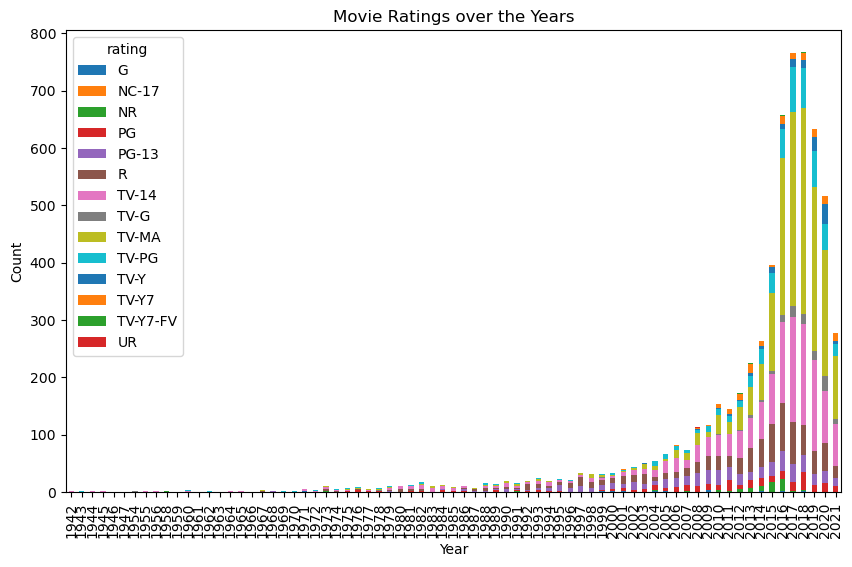

In [20]:
years_rates.plot.bar(
    stacked=True,
    figsize=(10, 6),
    ylabel="Count",
    xlabel="Year",
    title="Movie Ratings over the Years",
)

plt.show()

**TV Shows**  
I decided to do the same with TV Shows to see if trends were similar. 

In [21]:
shows = data[data["type"] == "TV Show"]

In [22]:
shows.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


**Years and Ratings**  
We can see that the TV shows' mean release years were all in the 2010s, likely reflecting the massive surge in Netflix and its streaming shows. The rating of TV-MA average is 2017 - 2018 which is later than most other ratings.

In [23]:
tv_years_and_ratings = shows.groupby(["rating"]).aggregate({"release_year": "mean"})

In [24]:
tv_years_and_ratings

,release_year
rating,
NR,2011.600000
R,2015.500000
TV-14,2015.698499
TV-G,2014.872340
TV-MA,2017.889956
TV-PG,2015.210526
TV-Y,2017.039773
TV-Y7,2015.410256
TV-Y7-FV,2014.000000


In [25]:
tv_years_rates = shows.groupby(["release_year", "rating"]).size().unstack(fill_value=0)

In [26]:
tv_years_rates

rating,NR,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV
release_year,,,,,,,,,
1925,0,0,1,0,0,0,0,0,0
1945,0,0,0,0,1,0,0,0,0
1946,0,0,1,0,0,0,0,0,0
1963,0,0,1,0,0,0,0,0,0
1967,0,0,0,1,0,0,0,0,0
1972,0,0,0,0,1,0,0,0,0
1974,0,0,1,0,0,0,0,0,0
1977,0,0,0,0,0,1,0,0,0
1979,0,0,0,0,0,1,0,0,0


Creating a similar stacked bar chart, we can see that TV-MA takes up a large portion of shows, especially after 2017, though most of the data is concentrated post-2010s anyways, so it is tough to see much of a trend before that. 

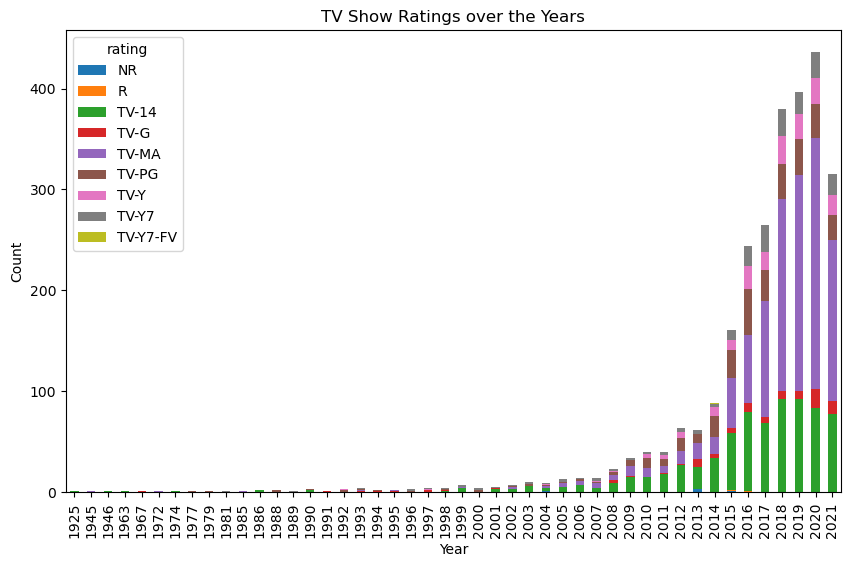

In [27]:
tv_years_rates.plot.bar(
    stacked=True,
    figsize=(10, 6),
    ylabel="Count",
    xlabel="Year",
    title="TV Show Ratings over the Years",
)

plt.show()

## Conclusion  
  
  I was interested in seeing if there was a trend in TV and movie maturity ratings over the years. Based on the data and graphs, it does seem that rated R and mature movies are taking up more of a portion of the content. However, some ratings, such as NC-17, were not introduced in the film industry until the late '90s. Additionally, the film industry has had controversy in regards to the inconsistency of content allowed in and between different movie ratings, e.g. the PG-13 movie rating is considered very broad and movie content vary greatly within PG-13 movies (source [Wikipedia](https://en.wikipedia.org/wiki/Motion_Picture_Association_film_rating_system)). Thus, it is possible that to err on the side of caution, especially with streaming services being so accessible ot children nowadays, that there is an inflation or 'over' count of mature ratings, explaining the seemingly large proportion of TV-MA content on Netflix. 